# <font color="maroon"><h4 align="center">RASHTRIYA RAKSHA UNIVERSITY</font>

# <font color="maroon"><h4 align="center">22nd Feb 2022</font>

# <font color="maroon"><h4 align="center">"Basic data analysis and summarization" </font>

### To start analysis we can use weather data

In [6]:
import pandas as pd
df = pd.read_csv("weather_by_cities.csv")
#df = pd.read_csv(r"C:\ankur\weather_by_cities.csv") WE have to provide the complete address of data if it is not stored in dir
df

,day,city,temperature,windspeed,event
0,1/1/2017,new york,32,6,Rain
1,1/2/2017,new york,36,7,Sunny
2,1/3/2017,new york,28,12,Snow
3,1/4/2017,new york,33,7,Sunny
4,1/1/2017,mumbai,90,5,Sunny
5,1/2/2017,mumbai,85,12,Fog
6,1/3/2017,mumbai,87,15,Fog
7,1/4/2017,mumbai,92,5,Rain
8,1/1/2017,paris,45,20,Sunny
9,1/2/2017,paris,50,13,Cloudy


In [10]:
df.head(7)

,day,city,temperature,windspeed,event
0,1/1/2017,new york,32,6,Rain
1,1/2/2017,new york,36,7,Sunny
2,1/3/2017,new york,28,12,Snow
3,1/4/2017,new york,33,7,Sunny
4,1/1/2017,mumbai,90,5,Sunny
5,1/2/2017,mumbai,85,12,Fog
6,1/3/2017,mumbai,87,15,Fog


In [13]:
df.tail(1)

,day,city,temperature,windspeed,event
11,1/4/2017,paris,42,10,Cloudy


In [14]:
df.describe() # It will showcase all important statistical information about your data

,temperature,windspeed
count,12.000000,12.000000
mean,56.166667,10.000000
std,25.044808,4.572646
min,28.000000,5.000000
25%,35.250000,6.750000
50%,47.500000,9.000000
75%,85.500000,12.250000
max,92.000000,20.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          12 non-null     object
 1   city         12 non-null     object
 2   temperature  12 non-null     int64 
 3   windspeed    12 non-null     int64 
 4   event        12 non-null     object
dtypes: int64(2), object(3)
memory usage: 608.0+ bytes


In [20]:
a = dd['city name']
a

0     new york
1     new york
2     new york
3     new york
4       mumbai
5       mumbai
6       mumbai
7       mumbai
8        paris
9        paris
10       paris
11       paris
Name: city, dtype: object

In [6]:
df.city.value_counts()


new york    4
mumbai      4
paris       4
Name: city, dtype: int64

In [7]:
df['event'].value_counts()

Sunny     4
Cloudy    3
Rain      2
Fog       2
Snow      1
Name: event, dtype: int64

In [8]:
df['event'].value_counts(normalize=True).sort_index()

Cloudy    0.250000
Fog       0.166667
Rain      0.166667
Snow      0.083333
Sunny     0.333333
Name: event, dtype: float64

In [9]:
df['event'].value_counts(normalize=True,ascending=True)*100

Snow       8.333333
Rain      16.666667
Fog       16.666667
Cloudy    25.000000
Sunny     33.333333
Name: event, dtype: float64

In [10]:
df[['event', 'city']].value_counts(normalize=True,ascending=True)*100

event   city    
Rain    mumbai       8.333333
        new york     8.333333
Snow    new york     8.333333
Sunny   mumbai       8.333333
        paris        8.333333
Fog     mumbai      16.666667
Sunny   new york    16.666667
Cloudy  paris       25.000000
dtype: float64

# Contingency Table

#### A contingency table is a tabular representation of categorical data . A contingency table usually shows frequencies for particular combinations of values of two discrete random variable s X and Y. Each cell in the table represents a mutually exclusive combination of X-Y values

In [11]:
pd.crosstab(df.city,df.event)

event,Cloudy,Fog,Rain,Snow,Sunny
city,,,,,
mumbai,0,2,1,0,1
new york,0,0,1,1,2
paris,3,0,0,0,1


## We can also "Total" column - by adding "margin" parameter

In [12]:
pd.crosstab(df.city,df.event,margins=True)

event,Cloudy,Fog,Rain,Snow,Sunny,All
city,,,,,,
mumbai,0,2,1,0,1,4
new york,0,0,1,1,2,4
paris,3,0,0,0,1,4
All,3,2,2,1,4,12


## We can also include more than two columns in crosstab

In [13]:
pd.crosstab(df.city,[df.event,df.temperature],margins=True)

event       Cloudy       Fog    Rain    Snow Sunny          All
temperature     42 50 54  85 87   32 92   28    33 36 45 90    
city                                                           
mumbai           0  0  0   1  1    0  1    0     0  0  0  1   4
new york         0  0  0   0  0    1  0    1     1  1  0  0   4
paris            1  1  1   0  0    0  0    0     0  0  1  0   4
All              1  1  1   1  1    1  1    1     1  1  1  1  12

Above result can also be repersent in Percentage terms

In [14]:
pd.crosstab(df.city,df.event,margins=True,normalize=True)

event,Cloudy,Fog,Rain,Snow,Sunny,All
city,,,,,,
mumbai,0.00,0.166667,0.083333,0.000000,0.083333,0.333333
new york,0.00,0.000000,0.083333,0.083333,0.166667,0.333333
paris,0.25,0.000000,0.000000,0.000000,0.083333,0.333333
All,0.25,0.166667,0.166667,0.083333,0.333333,1.000000


## Using Aggregate function to see - Average, Max or Min values

In [15]:
import numpy as np
pd.crosstab(df.city,df.event,margins=True,values=df.temperature,aggfunc=np.average)

event,Cloudy,Fog,Rain,Snow,Sunny,All
city,,,,,,
mumbai,NaN,86.0,92.0,NaN,90.0,88.500000
new york,NaN,NaN,32.0,28.0,34.5,32.250000
paris,48.666667,NaN,NaN,NaN,45.0,47.750000
All,48.666667,86.0,62.0,28.0,51.0,56.166667


In [16]:
pd.crosstab(df.city,df.event,margins=True,values=df.temperature,aggfunc=np.max)

event,Cloudy,Fog,Rain,Snow,Sunny,All
city,,,,,,
mumbai,NaN,87.0,92.0,NaN,90.0,92
new york,NaN,NaN,32.0,28.0,36.0,36
paris,54.0,NaN,NaN,NaN,45.0,54
All,54.0,87.0,92.0,28.0,90.0,92


In [17]:
pd.crosstab(df.city,df.event,margins=True,values=df.temperature,aggfunc=np.min)

event,Cloudy,Fog,Rain,Snow,Sunny,All
city,,,,,,
mumbai,NaN,85.0,92.0,NaN,90.0,85
new york,NaN,NaN,32.0,28.0,33.0,28
paris,42.0,NaN,NaN,NaN,45.0,42
All,42.0,85.0,32.0,28.0,33.0,28


## Dropna will remove the columns where all values are NAN

In [18]:
pd.crosstab(df.city,df.event,margins=True,values=df.temperature,aggfunc=np.average,dropna=True)

event,Cloudy,Fog,Rain,Snow,Sunny,All
city,,,,,,
mumbai,NaN,86.0,92.0,NaN,90.0,88.500000
new york,NaN,NaN,32.0,28.0,34.5,32.250000
paris,48.666667,NaN,NaN,NaN,45.0,47.750000
All,48.666667,86.0,62.0,28.0,51.0,56.166667


## Pivot and Pivot table function

### Pivot allow data transformation and reshaping the data

In [19]:
df.pivot(index='temperature',columns='city')

day                     windspeed                 event  \
city           mumbai  new york     paris    mumbai new york paris mumbai   
temperature                                                                 
28                NaN  1/3/2017       NaN       NaN     12.0   NaN    NaN   
32                NaN  1/1/2017       NaN       NaN      6.0   NaN    NaN   
33                NaN  1/4/2017       NaN       NaN      7.0   NaN    NaN   
36                NaN  1/2/2017       NaN       NaN      7.0   NaN    NaN   
42                NaN       NaN  1/4/2017       NaN      NaN  10.0    NaN   
45                NaN       NaN  1/1/2017       NaN      NaN  20.0    NaN   
50                NaN       NaN  1/2/2017       NaN      NaN  13.0    NaN   
54                NaN       NaN  1/3/2017       NaN      NaN   8.0    NaN   
85           1/2/2017       NaN       NaN      12.0      NaN   NaN    Fog   
87           1/3/2017       NaN       NaN      15.0      NaN   NaN    Fog   
90           1/1/2017       NaN       NaN       5.0      NaN   NaN  Sunny   
92           1/4/2017       NaN       NaN       5.0      NaN   NaN   Rain   

                              
city        new york   paris  
temperature                   
28              Snow     NaN  
32              Rain     NaN  
33             Sunny     NaN  
36             Sunny     NaN  
42               NaN  Cloudy  
45               NaN   Sunny  
50               NaN  Cloudy  
54               NaN  Cloudy  
85               NaN     NaN  
87               NaN     NaN  
90               NaN     NaN  
92               NaN     NaN

### Here multiple features can be used for Rows (index) or columns, also values can be used for aggregation

In [20]:
df.pivot(index='temperature',columns=['city','event'],values='windspeed')

city        new york             mumbai            paris       
event           Rain Sunny  Snow  Sunny   Fog Rain Sunny Cloudy
temperature                                                    
28               NaN   NaN  12.0    NaN   NaN  NaN   NaN    NaN
32               6.0   NaN   NaN    NaN   NaN  NaN   NaN    NaN
33               NaN   7.0   NaN    NaN   NaN  NaN   NaN    NaN
36               NaN   7.0   NaN    NaN   NaN  NaN   NaN    NaN
42               NaN   NaN   NaN    NaN   NaN  NaN   NaN   10.0
45               NaN   NaN   NaN    NaN   NaN  NaN  20.0    NaN
50               NaN   NaN   NaN    NaN   NaN  NaN   NaN   13.0
54               NaN   NaN   NaN    NaN   NaN  NaN   NaN    8.0
85               NaN   NaN   NaN    NaN  12.0  NaN   NaN    NaN
87               NaN   NaN   NaN    NaN  15.0  NaN   NaN    NaN
90               NaN   NaN   NaN    5.0   NaN  NaN   NaN    NaN
92               NaN   NaN   NaN    NaN   NaN  5.0   NaN    NaN

## Pivot table is used to summarise and aggregate the data inside DataFrame

In [21]:
df.pivot_table(index='city',columns='day',aggfunc='mean',margins=True)

temperature                                            windspeed  \
day         1/1/2017 1/2/2017   1/3/2017   1/4/2017        All   1/1/2017   
city                                                                        
mumbai     90.000000       85  87.000000  92.000000  88.500000   5.000000   
new york   32.000000       36  28.000000  33.000000  32.250000   6.000000   
paris      45.000000       50  54.000000  42.000000  47.750000  20.000000   
All        55.666667       57  56.333333  55.666667  56.166667  10.333333   

                                                  
day        1/2/2017   1/3/2017   1/4/2017    All  
city                                              
mumbai    12.000000  15.000000   5.000000   9.25  
new york   7.000000  12.000000   7.000000   8.00  
paris     13.000000   8.000000  10.000000  12.75  
All       10.666667  11.666667   7.333333  10.00

### By default date generally read as string and we need to convert it to datatime stamp

In [22]:
type(df['day'][0])

str

In [23]:
df['day'] = pd.to_datetime(df['day'])

In [24]:
df.pivot_table(index=pd.Grouper(freq='W',key='day'),columns='city')

temperature                        windspeed                     
city            mumbai   new york      paris     mumbai  new york      paris
day                                                                         
2017-01-01        90.0  32.000000  45.000000   5.000000  6.000000  20.000000
2017-01-08        88.0  32.333333  48.666667  10.666667  8.666667  10.333333

In [25]:
a = df['city']
print(type(df))
type(a)

<class 'pandas.core.frame.DataFrame'>


pandas.core.series.Series

### For this dataset, get following answers,
#### 1. What was the maximum temperature in each of these 3 cities?
#### 2. What was the average windspeed in each of these 3 cities?


In [26]:
g = df.groupby("city")
g


**DataFrameGroupBy object looks something like below,**

<img src="group_by_cities.png">

In [27]:
g.get_group('mumbai')

,day,city,temperature,windspeed,event
4,2017-01-01,mumbai,90,5,Sunny
5,2017-01-02,mumbai,85,12,Fog
6,2017-01-03,mumbai,87,15,Fog
7,2017-01-04,mumbai,92,5,Rain


In [28]:
for city, data in g:
    print("city:",city)
    print("\n")
    print("data:",data) 

city: mumbai


data:          day    city  temperature  windspeed  event
4 2017-01-01  mumbai           90          5  Sunny
5 2017-01-02  mumbai           85         12    Fog
6 2017-01-03  mumbai           87         15    Fog
7 2017-01-04  mumbai           92          5   Rain
city: new york


data:          day      city  temperature  windspeed  event
0 2017-01-01  new york           32          6   Rain
1 2017-01-02  new york           36          7  Sunny
2 2017-01-03  new york           28         12   Snow
3 2017-01-04  new york           33          7  Sunny
city: paris


data:           day   city  temperature  windspeed   event
8  2017-01-01  paris           45         20   Sunny
9  2017-01-02  paris           50         13  Cloudy
10 2017-01-03  paris           54          8  Cloudy
11 2017-01-04  paris           42         10  Cloudy


In [29]:
for city, data in g:
    print("city:",city)
    print("\n")
    print("data:",data)    

city: mumbai


data:          day    city  temperature  windspeed  event
4 2017-01-01  mumbai           90          5  Sunny
5 2017-01-02  mumbai           85         12    Fog
6 2017-01-03  mumbai           87         15    Fog
7 2017-01-04  mumbai           92          5   Rain
city: new york


data:          day      city  temperature  windspeed  event
0 2017-01-01  new york           32          6   Rain
1 2017-01-02  new york           36          7  Sunny
2 2017-01-03  new york           28         12   Snow
3 2017-01-04  new york           33          7  Sunny
city: paris


data:           day   city  temperature  windspeed   event
8  2017-01-01  paris           45         20   Sunny
9  2017-01-02  paris           50         13  Cloudy
10 2017-01-03  paris           54          8  Cloudy
11 2017-01-04  paris           42         10  Cloudy


**This is similar to SQL,**

**SELECT * from weather_data GROUP BY city**

In [30]:
g.max()

,day,temperature,windspeed,event
city,,,,
mumbai,2017-01-04,92,15,Sunny
new york,2017-01-04,36,12,Sunny
paris,2017-01-04,54,20,Sunny


In [31]:
g.mean()

,temperature,windspeed
city,,
mumbai,88.50,9.25
new york,32.25,8.00
paris,47.75,12.75


**This method of splitting your dataset in smaller groups and then applying an operation 
(such as min or max) to get aggregate result is called Split-Apply-Combine. It is illustrated in a diagram below**

<img src="split_apply_combine.png">

In [32]:
g.min()

,day,temperature,windspeed,event
city,,,,
mumbai,2017-01-01,85,5,Fog
new york,2017-01-01,28,6,Rain
paris,2017-01-01,42,8,Cloudy


In [33]:
g.describe()

temperature                                                   \
               count   mean       std   min    25%   50%    75%   max   
city                                                                    
mumbai           4.0  88.50  3.109126  85.0  86.50  88.5  90.50  92.0   
new york         4.0  32.25  3.304038  28.0  31.00  32.5  33.75  36.0   
paris            4.0  47.75  5.315073  42.0  44.25  47.5  51.00  54.0   

         windspeed                                                 
             count   mean       std  min   25%   50%    75%   max  
city                                                               
mumbai         4.0   9.25  5.057997  5.0  5.00   8.5  12.75  15.0  
new york       4.0   8.00  2.708013  6.0  6.75   7.0   8.25  12.0  
paris          4.0  12.75  5.251984  8.0  9.50  11.5  14.75  20.0

In [34]:
g.size()

city
mumbai      4
new york    4
paris       4
dtype: int64

In [35]:
g.count()

,day,temperature,windspeed,event
city,,,,
mumbai,4,4,4,4
new york,4,4,4,4
paris,4,4,4,4


city
mumbai      AxesSubplot(0.125,0.125;0.775x0.755)
new york    AxesSubplot(0.125,0.125;0.775x0.755)
paris       AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

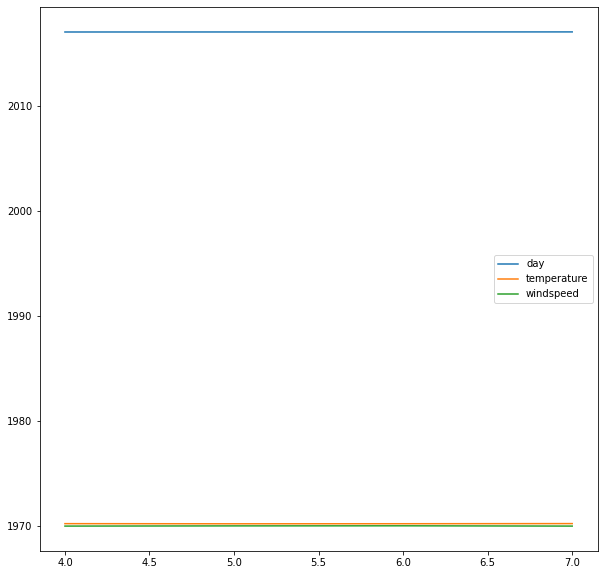

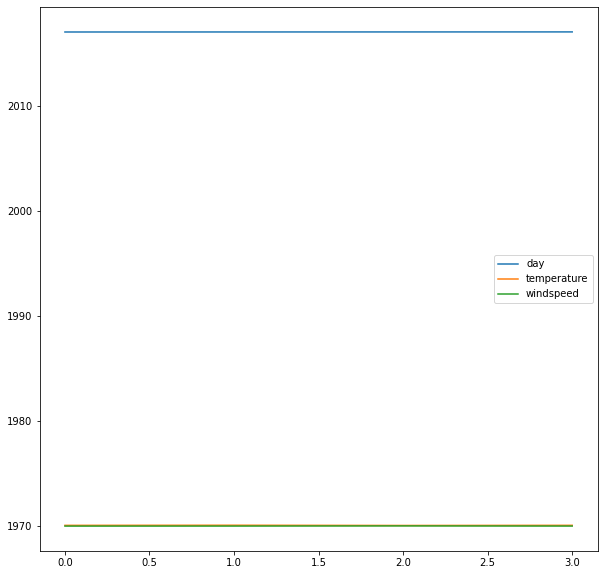

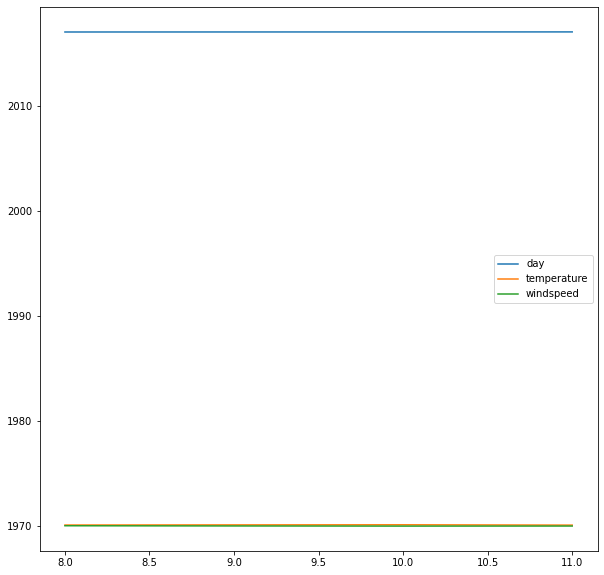

In [36]:
%matplotlib inline
g.plot(figsize=(10,10))

mumbai           AxesSubplot(0.1,0.559091;0.363636x0.340909)
new york    AxesSubplot(0.536364,0.559091;0.363636x0.340909)
paris                AxesSubplot(0.1,0.15;0.363636x0.340909)
dtype: object

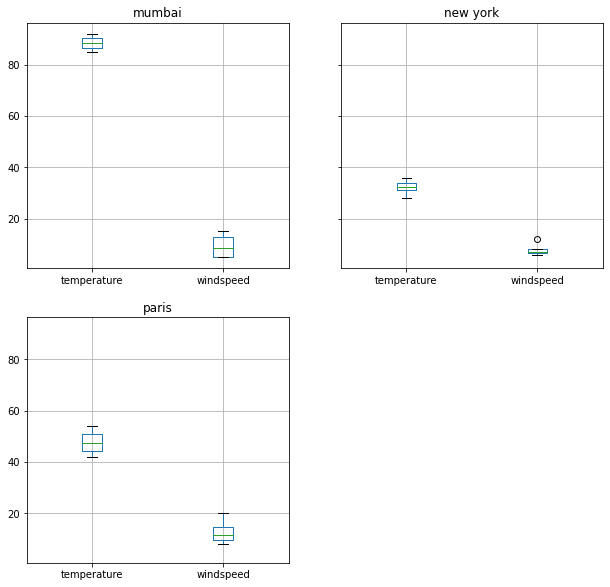

In [37]:
%matplotlib inline
g.boxplot(figsize=(10,10))

<h4>Group data using custom function: Let's say you want to group your data using custom function. Here the requirement is to create three groups<h4>
<ol>
    <li>Days when temperature was between 80 and 90</li>
    <li>Days when it was between 50 and 60</li>
    <li>Days when it was anything else</li>
</ol>

For this you need to write custom grouping function and pass that to groupby

In [38]:
def grouper(df, idx, col):
    if 80 <= df[col].loc[idx] <= 90:
        return '80-90'
    elif 50 <= df[col].loc[idx] <= 60:
        return '50-60'
    else:
        return 'others'

In [39]:
g = df.groupby(lambda x: grouper(df, x, 'temperature'))
g

In [40]:
for key, d in g:
    print("Group by Key: {}\n".format(key))
    print(d)

Group by Key: 50-60

          day   city  temperature  windspeed   event
9  2017-01-02  paris           50         13  Cloudy
10 2017-01-03  paris           54          8  Cloudy
Group by Key: 80-90

         day    city  temperature  windspeed  event
4 2017-01-01  mumbai           90          5  Sunny
5 2017-01-02  mumbai           85         12    Fog
6 2017-01-03  mumbai           87         15    Fog
Group by Key: others

          day      city  temperature  windspeed   event
0  2017-01-01  new york           32          6    Rain
1  2017-01-02  new york           36          7   Sunny
2  2017-01-03  new york           28         12    Snow
3  2017-01-04  new york           33          7   Sunny
7  2017-01-04    mumbai           92          5    Rain
8  2017-01-01     paris           45         20   Sunny
11 2017-01-04     paris           42         10  Cloudy


## Quantiles and Percentiles

In [41]:
np.percentile(df['temperature'],[25,50,75])

array([35.25, 47.5 , 85.5 ])

In [42]:
import statistics

In [43]:
statistics.quantiles(df['temperature'],n=10)

[29.2, 32.6, 35.7, 42.6, 47.5, 53.2, 85.2, 88.2, 91.4]

In [44]:
 np.quantile(df['temperature'],[.25,.50,.75])

array([35.25, 47.5 , 85.5 ])

In [45]:
df.describe()

,temperature,windspeed
count,12.000000,12.000000
mean,56.166667,10.000000
std,25.044808,4.572646
min,28.000000,5.000000
25%,35.250000,6.750000
50%,47.500000,9.000000
75%,85.500000,12.250000
max,92.000000,20.000000


In [46]:
df.describe([0.10,.20,.35])

,temperature,windspeed
count,12.000000,12.000000
mean,56.166667,10.000000
std,25.044808,4.572646
min,28.000000,5.000000
10%,32.100000,5.100000
20%,33.600000,6.200000
35%,41.100000,7.000000
50%,47.500000,9.000000
max,92.000000,20.000000


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   day          12 non-null     datetime64[ns]
 1   city         12 non-null     object        
 2   temperature  12 non-null     int64         
 3   windspeed    12 non-null     int64         
 4   event        12 non-null     object        
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 608.0+ bytes


In [48]:
var1 = df.describe([0.10,.20,.35])

In [49]:
var1['temperature']

count    12.000000
mean     56.166667
std      25.044808
min      28.000000
10%      32.100000
20%      33.600000
35%      41.100000
50%      47.500000
max      92.000000
Name: temperature, dtype: float64

In [50]:
var1['temperature']['mean']

56.166666666666664